### 09_EncoderDecoder_mnist

In [1]:
import os, sys
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input, UpSampling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import cifar10
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

X_train.shape:  (50000, 32, 32, 3)
Y_train.shape:  (50000, 1)
X_test.shape:  (10000, 32, 32, 3)
Y_test.shape:  (10000, 1)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
[6]


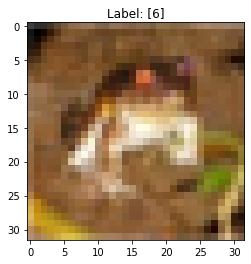

In [2]:
# 指定亂數種子
seed = 10
np.random.seed(seed)
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print("X_train.shape: ", X_train.shape)
print("Y_train.shape: ", Y_train.shape)
print("X_test.shape: ", X_test.shape)
print("Y_test.shape: ", Y_test.shape)
# 顯示 Numpy 二維陣列內容
print(X_train[0])
print(Y_train[0])   # 標籤資料

plt.imshow(X_train[0], cmap="binary")
plt.title("Label: " + str(Y_train[0]))
plt.show()

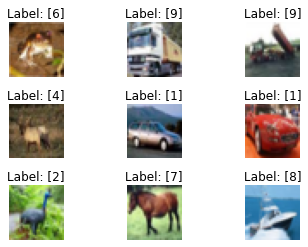

In [3]:
sub_plot= 330
for i in range(0, 9):
    ax = plt.subplot(sub_plot+i+1)
    ax.imshow(X_train[i], cmap="binary")
    ax.set_title("Label: " + str(Y_train[i]))
    ax.axis("off")

plt.subplots_adjust(hspace = .5)
# 顯示數字圖片
plt.show()

In [4]:
# r,g,b 是 0~255
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
Y_test_bk = Y_test.copy()   # 備份 Y_test 資料集
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding="same", activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(Y_train.shape[1], activation="softmax"))
model.summary()
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [6]:
# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2, 
                    epochs=3, batch_size=128, verbose=2)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 儲存Keras模型
print("Saving Model: cifar10.h5 ...")
model.save(os.path.join(".","model_data","cifar10_09.h5"))

Train on 40000 samples, validate on 10000 samples
Epoch 1/3
40000/40000 - 39s - loss: 1.5496 - accuracy: 0.4381 - val_loss: 1.3399 - val_accuracy: 0.5428
Epoch 2/3
40000/40000 - 40s - loss: 1.3053 - accuracy: 0.5307 - val_loss: 1.2045 - val_accuracy: 0.5806
Epoch 3/3
40000/40000 - 40s - loss: 1.1726 - accuracy: 0.5806 - val_loss: 1.0880 - val_accuracy: 0.6222

Testing ...
訓練資料集的準確度 = 0.65
測試資料集的準確度 = 0.62
Saving Model: cifar10.h5 ...


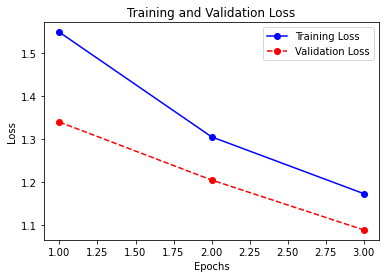

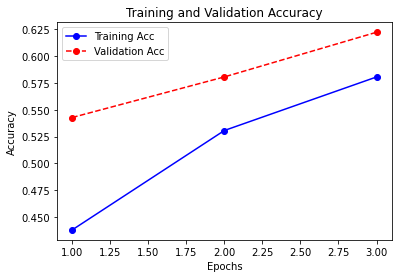

In [7]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [11]:
### 讀取模型
model = Sequential()
model = load_model(os.path.join(".","model_data","cifar10_09.h5"))
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 評估模型
print("Testing ...")
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 計算分類的預測值
print("\nPredicting ...")
Y_pred = model.predict_classes(X_test)
# 顯示混淆矩陣
tb = pd.crosstab(Y_test_bk.astype(int).flatten(), 
                 Y_pred.astype(int),
                 rownames=["label"], colnames=["predict"])
print(tb)
#tb.to_html("Ch9_1_3.html")

Testing ...
測試資料集的準確度 = 0.62

Predicting ...
predict    0    1    2    3    4    5    6    7    8    9
label                                                    
0        584   32   77   37   12    8   20   19  153   58
1         10  752    6   14    0    3   14    9   39  153
2         59   10  426  124   74   75  110   82   21   19
3         11   18   42  554   49  130  121   44   11   20
4         10    9  102  137  418   34  146  120   19    5
5         13    7   34  275   51  460   58   81   13    8
6          2    8   30   89   24    9  814   10    5    9
7          8    3   20   80   38   56   21  728    8   38
8         49   72   12   31    4    6   12   15  743   56
9         23  132    5   13    6    4   19   30   45  723


Predicting ...
probs [[0.04642417 0.01848584 0.18549684 0.35551217 0.16966455 0.09459993
  0.05261345 0.04894636 0.01854434 0.00971242]]
(1, 10)


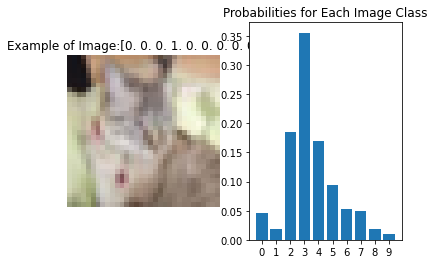

In [14]:
i = 8
img = X_test[i]
# 將圖片轉換成 4D 張量
X_test_img = img.reshape(1, 32, 32, 3).astype("float32")
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_test_img = X_test_img / 255

# 繪出圖表的預測結果
plt.figure()
plt.subplot(1,2,1)
plt.title("Example of Image:" + str(Y_test[i]))
plt.imshow(img, cmap="binary")
plt.axis("off")
# 預測結果的機率
print("Predicting ...")
probs = model.predict_proba(X_test_img, batch_size=1)
print("probs",probs)
print(probs.shape)
plt.subplot(1,2,2)
plt.title("Probabilities for Each Image Class")
plt.bar(np.arange(10), probs.reshape(10), align="center")
plt.xticks(np.arange(10),np.arange(10).astype(str))
plt.show()

Predicting ...
Y_pred.shape (10000,)
Y_probs.shape (10000, 10)
    label  predict
15      8        6
17      7        3
21      0        2
22      4        2
24      5        4
Index:  4210


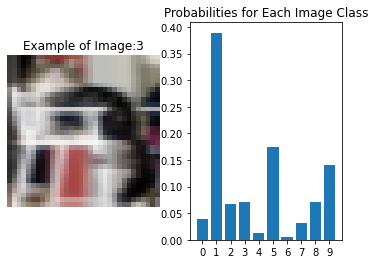

In [20]:
# (a, b), (c, Y_test) = cifar10.load_data()
# 測試資料集的分類和機率的預測值
print("Predicting ...")
Y_pred = model.predict_classes(X_test)  # 分類
Y_probs = model.predict_proba(X_test)   # 機率
print("Y_pred.shape",Y_pred.shape)
print("Y_probs.shape",Y_probs.shape)
# 建立分類錯誤的 DataFrame 物件
Y_test = Y_test.flatten()
df = pd.DataFrame({"label":Y_test, "predict":Y_pred})
df = df[Y_test!=Y_pred]  # 篩選出分類錯誤的資料
print(df.head())
#df.head().to_html("Ch9_1_3b.html")
# 隨機選 1 個錯誤分類的數字索引
i = df.sample(n=1).index.values.astype(int)[0]
print("Index: ", i)
img = X_test[i] 
# 繪出圖表的預測結果
plt.figure()
plt.subplot(1,2,1)
plt.title("Example of Image:" + str(Y_test[i]))
plt.imshow(img, cmap="binary")
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Probabilities for Each Image Class")
plt.bar(np.arange(10), Y_probs[i].reshape(10), align="center")
plt.xticks(np.arange(10),np.arange(10).astype(str))
plt.show()

# 載入糖尿病資料集

In [25]:
df = pd.read_csv(os.path.join(".","train_data","diabetes.csv"))
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
X = dataset[:,:8]
Y = dataset[:,8]
print(X.shape)
inputs = Input(shape=(X.shape[1],))
d1 = Dense(10, activation="relu")(inputs)
d2 = Dense(8, activation="relu")(d1)
outputs = Dense(1, activation="sigmoid")(d2)
model = Model(inputs=inputs, outputs=outputs)
model.summary()
model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model.fit(X, Y, epochs=15, batch_size=10, verbose=0)
loss, accuracy = model.evaluate(X, Y, verbose=0)
print("準確度 = {:.2f}".format(accuracy))
print("Saving Model: diabetes.h5 ...")
model.save(os.path.join(".","model_data","diabetes_09.h5"))

(768, 8)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 187
Trainable params: 187
Non-trainable params: 0
_________________________________________________________________
準確度 = 0.69


# 隱藏層壓縮 解壓

In [28]:
seed = 7
np.random.seed(seed)
(X_train, _), (X_test, _) = mnist.load_data()
input_dim = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], input_dim).astype("float32")
X_test = X_test.reshape(X_test.shape[0], input_dim).astype("float32")
X_train = X_train / 255
X_test = X_test / 255

# 定義 autoencoder 模型
inputs = Input(shape=(input_dim,))
x = Dense(128, activation="relu")(inputs)
encoded = Dense(64, activation="relu")(x)
x = Dense(128, activation="relu")(encoded)
outputs = Dense(784, activation="sigmoid")(x)
autoencoder = Model(inputs, outputs)
autoencoder.summary()

# 定義 encoder 模型
encoder = Model(inputs, encoded)
encoder.summary()    # 顯示模型摘要資訊

# 定義 decoder 模型
decoder_input = Input(shape=(64,))
decoder_layer = autoencoder.layers[-2](decoder_input)
decoder_layer = autoencoder.layers[-1](decoder_layer)
decoder = Model(decoder_input, decoder_layer)
decoder.summary()    # 顯示模型摘要資訊

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_13 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_14 (Dense)             (None, 784)               101136    
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output 

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 - 7s - loss: 0.2223 - accuracy: 0.7909 - val_loss: 0.1401 - val_accuracy: 0.8075
Epoch 2/3
60000/60000 - 4s - loss: 0.1245 - accuracy: 0.8102 - val_loss: 0.1125 - val_accuracy: 0.8102
Epoch 3/3
60000/60000 - 4s - loss: 0.1074 - accuracy: 0.8126 - val_loss: 0.1010 - val_accuracy: 0.8124


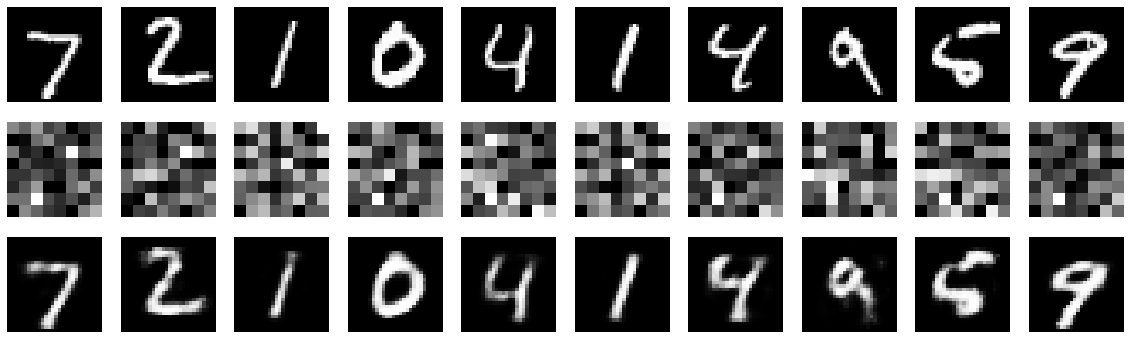

In [30]:
# 編譯模型
autoencoder.compile(loss="binary_crossentropy", optimizer="adam",
                    metrics=["accuracy"])
# 訓練模型
autoencoder.fit(X_train, X_train, validation_data=(X_test, X_test), 
                epochs=3, batch_size=256, shuffle=True, verbose=2)
# 壓縮圖片
encoded_imgs = encoder.predict(X_test)
# 解壓縮圖片
decoded_imgs = decoder.predict(encoded_imgs)
# 顯示原始, 壓縮和還原圖片

n = 10  # 顯示幾個數字
plt.figure(figsize=(20, 6))
for i in range(n):
    # 原始圖片
    ax = plt.subplot(3, n, i + 1)
    ax.imshow(X_test[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
    # 壓縮圖片
    ax = plt.subplot(3, n, i + 1 + n)
    ax.imshow(encoded_imgs[i].reshape(8, 8), cmap="gray")
    ax.axis("off")
    # 還原圖片
    ax = plt.subplot(3, n, i + 1 + 2*n)
    ax.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
plt.show()

# 隱藏層 壓縮 解壓 Conv2D

In [33]:
# 指定亂數種子
seed = 7
np.random.seed(seed)
# 載入資料集
(X_train, _), (X_test, _) = mnist.load_data()
# 轉換成 4D 張量
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32")
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train / 255
X_test = X_test / 255
# 替圖片製造雜訊
nf = 0.5
size_train = X_train.shape
X_train_noisy = X_train+nf*np.random.normal(loc=0.0,
                          scale=1.0,size=size_train)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
size_test = X_test.shape
X_test_noisy = X_test+nf*np.random.normal(loc=0.0,
                          scale=1.0,size=size_test)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)
# 定義 autoencoder 模型
input_img = Input(shape=(28,28,1))
x = Conv2D(16, (3,3), activation="relu", padding="same")(input_img)
x = MaxPooling2D((2,2), padding="same")(x)
x = Conv2D(8, (3,3), activation="relu", padding="same")(x)
x = MaxPooling2D((2,2), padding="same")(x)
x = Conv2D(8, (3,3), activation="relu", padding="same")(x)
encoded = MaxPooling2D((2,2), padding="same")(x)
x = Conv2D(8, (3,3), activation="relu", padding="same")(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(8, (3,3), activation="relu", padding="same")(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16, (3,3), activation="relu")(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)
autoencoder = Model(input_img, decoded)
autoencoder.summary()   # 顯示模型摘要資訊
# 定義 encoder 模型
encoder = Model(input_img, encoded)
encoder.summary()    # 顯示模型摘要資訊
# 定義 decoder 模型
decoder_input = Input(shape=(4,4,8))
decoder_layer = autoencoder.layers[-7](decoder_input)
decoder_layer = autoencoder.layers[-6](decoder_layer)
decoder_layer = autoencoder.layers[-5](decoder_layer)
decoder_layer = autoencoder.layers[-4](decoder_layer)
decoder_layer = autoencoder.layers[-3](decoder_layer)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)
decoder = Model(decoder_input, decoder_layer)
decoder.summary()   # 顯示模型摘要資訊
# 編譯模型
autoencoder.compile(loss="binary_crossentropy", optimizer="adam",
                    metrics=["accuracy"])
# 訓練模型
autoencoder.fit(X_train_noisy, X_train, 
                validation_data=(X_test_noisy, X_test), 
                epochs=3, batch_size=128, shuffle=True, verbose=2)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 8)           0   

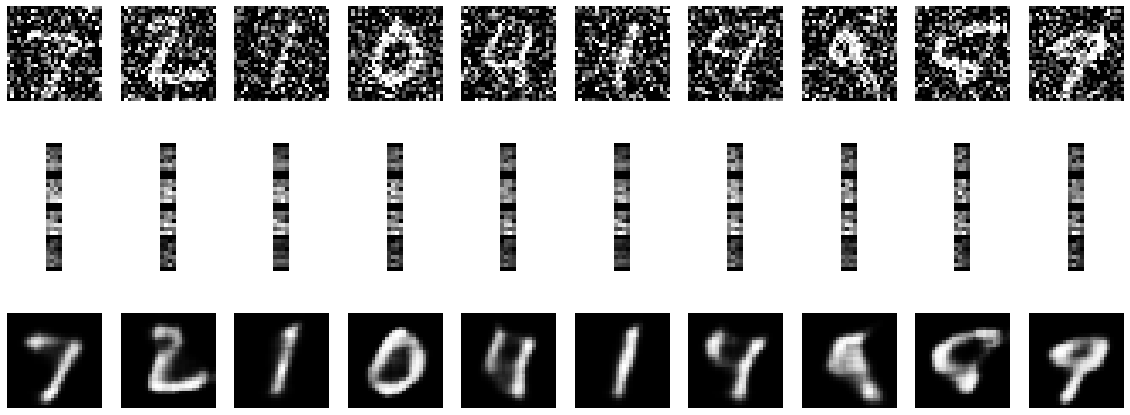

In [34]:
# 壓縮圖片
encoded_imgs = encoder.predict(X_test_noisy)
# 解壓縮圖片
decoded_imgs = decoder.predict(encoded_imgs)
# 顯示雜訊圖片, 壓縮圖片和還原圖片

n = 10  # 顯示幾個數字
plt.figure(figsize=(20, 8))
for i in range(n):
    # 雜訊圖片
    ax = plt.subplot(3, n, i + 1)
    ax.imshow(X_test_noisy[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
    # 壓縮圖片
    ax = plt.subplot(3, n, i + 1 + n)
    ax.imshow(encoded_imgs[i].reshape(4, 4*8).T, cmap="gray")
    ax.axis("off")
    # 還原圖片
    ax = plt.subplot(3, n, i + 1 + 2*n)
    ax.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
plt.show()